## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [3]:
print(X.isnull().sum(),'\n')
print(X.dtypes)

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64 

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object


#### В датасете нет категориальных переменных, тип данных по столбцам - вещественные
#### В датасете нет пропущенных значений

**Задача 1.2 (0.5 балла)**

Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3.

Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении.

**Почему это важно?**

In [4]:
from sklearn.model_selection import train_test_split
np.random.seed(1310)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)

#### Использовать 'stratify' важно, так как этот аргумент помогает сделать соотношения классов одинаковым на тренировочной выборке и на тестовой.

**Задача 1.3 (1 балл)**

На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей.

Для первого классификатора число соседей поставьте равным 1,

для второго - 3,

для третьего – 5,

для четвертого – 10,

для пятого – 15

для шестого – 25

(обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`).

 Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние.

 Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [6]:
n=[1,3,5,10,15,25]
X_tr_two=X_train[['alcohol','magnesium']]
X_te_two=X_test[['alcohol','magnesium']]
#отмасштабировала признаки:
scaler= StandardScaler()
X_tr_scl = scaler.fit_transform(X_tr_two)
X_te_scl = scaler.transform(X_te_two)
trainn=[]
testt=[]
clff=[]
for i in n:
  KNN=KNeighborsClassifier(n_neighbors=i,p=2) #использую цикл, чтобы перебирать кол-во соседей в классификаторе
  KNN.fit(X_tr_scl,y_train) #обучаю на отмасштабированной тренировочной выборке
  tr_acc=accuracy_score(y_train,KNN.predict(X_tr_scl)) #второй аргумент внутри - предсказание. Подсчитываю долю верных ответов на трейне
  te_acc=accuracy_score(y_test,KNN.predict(X_te_scl))
  #добавляю результаты в списки, чтобы потом сформировать датафрейм
  trainn.append(tr_acc)
  testt.append(te_acc)
  #сохраняю классификаторы, чтобы использовать их в следующем задании и не обучать заново:
  clff.append(KNN)
table=pd.DataFrame({'NN':n,'Train':trainn, 'Test':testt})
print(table)

   NN     Train      Test
0   1  1.000000  0.666667
1   3  0.822581  0.685185
2   5  0.782258  0.648148
3  10  0.733871  0.722222
4  15  0.741935  0.648148
5  25  0.717742  0.666667


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [7]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [8]:
import mlxtend

**Задача 1.5 (1 балл)**

Постройте сетку (decision regions grid) для обученных выше классификаторов.

**Подсказки:**

3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.

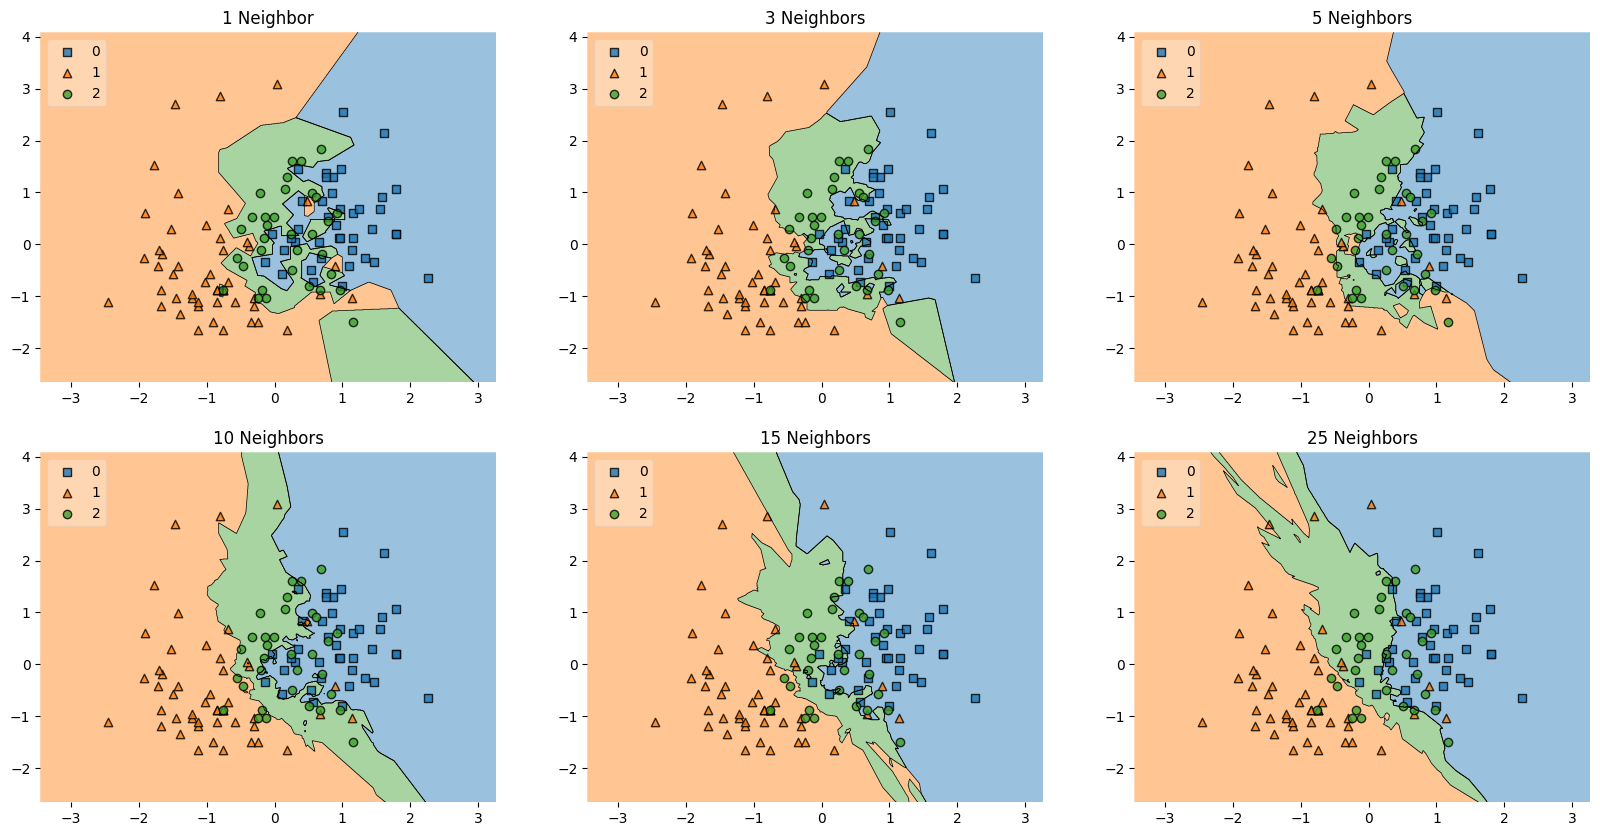

In [15]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
size=(2,3)
gs = gridspec.GridSpec(*size)

fig = plt.figure(figsize=(20,10))

labels = ['1 Neighbor', '3 Neighbors', '5 Neighbors', '10 Neighbors','15 Neighbors','25 Neighbors']
for clf, lab, grd in zip(clff, #запомненные классификаторы
                         labels,
                          itertools.product(range(size[0]), range(size[1]))): #сочетания по комбинациям
    ax = plt.subplot(gs[grd[0], grd[1]]) #положения графиков в "строке" и "столбце" сетки
    fig = plot_decision_regions(X=X_tr_scl, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

#### Выводы по 1.3: самая высокая доля правильных ответов наблюдается при трех ближайших соседях на трейне (82%) и при 10 на тесте (72%).

#### Выводы по 1.5: явно переобучилась модель с 1 соседом, так как она выдает банально ответ для самого элемента. Судя по графику действительно неплохо сработала модель с 10 соседями - выбросы игнорируются (оранжевый треугольник на зеленом фоне, например), а все остальное классифицированно в рамках адекватного. Модель с 3 соседями тоже неплохо справилась, но на мой взгляд там присутствует некоторое преобучение, так как центральная область вся в "рытвинах" из-за того, что модель не смогла обощить результат.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

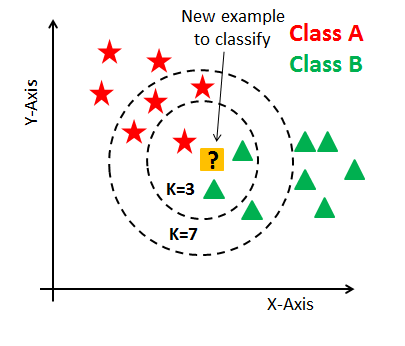

In [16]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X_tr=X #тренировочная, признаки
      self.y_tr=y #тренировочная, целевая переменная

    def predict(self, X):
      pred=[]
      for i in X:
        dist=[self.count_distance(tr,i) for tr in self.X_tr] #использую функцию подсчета евклидова расстояния (ниже),
        #нахожу расстояния от элемента,для которого требуется предсказание, до каждого из трейна
        ind=np.argsort(dist)[:self.k] #сортирую расстояния до соседей и беру из них только k ближайших
        klass= self.y_tr[ind] #нахожу, какие "ответы" у ближайших соседей.
        label=(Counter(klass).most_common(1))[0][0] #подсчет с помощью каунтера самого часто встречающегося класса среди соседей
        #label=np.argmax(np.bincount(klass)) - комментарий для себя на подумать
        pred.append(label)
      return(np.array(pred))
    def count_distance(self, x, y):
      return(np.linalg.norm(x-y)) #использую нампаевскую функцию нахождения евкл. расстояния, чтобы не считать по формуле

In [17]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [18]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [72]:
!wget https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2024/homeworks/hw04_knn_linreg/diamonds.csv
data = pd.read_csv('/content/diamonds.csv')
data.head(5)

--2024-03-27 20:07:59--  https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2024/homeworks/hw04_knn_linreg/diamonds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3192560 (3.0M) [text/plain]
Saving to: ‘diamonds.csv.3’

diamonds.csv.3      100%[===================>]   3.04M  12.7MB/s    in 0.2s    

2024-03-27 20:08:00 (12.7 MB/s) - ‘diamonds.csv.3’ saved [3192560/3192560]



,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [73]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

#### Пропущенных значений нет. Дальше удаляю столбец, который не несет никакого смысла:

In [74]:
data.drop(columns=['Unnamed: 0'], inplace=True) #удаляю в начальном датафрейме, чтобы не множить копии
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.2 (0.1 балла)**

Для следующих пунктов нам также потребуются выборочные корреляции между признаками.

 Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [75]:
#общие комменты по заданию ниже хитмапа
data.corr()

<ipython-input-75-51d2087e4029>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<ipython-input-76-ab8bfad0b2e9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(), cmap='cool', annot=True, fmt="0.4f")


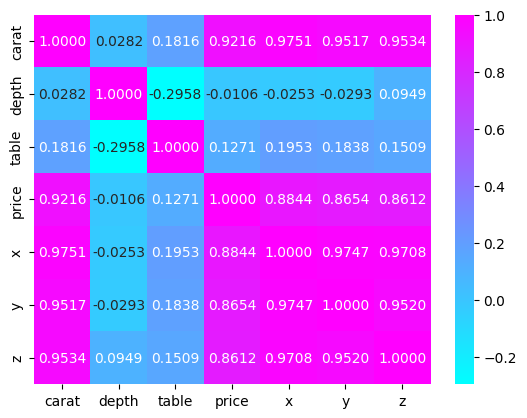

In [76]:
#поскольку по цвету всегда проще понимать, решила еще хитмап вывести
import seaborn as sns
ax = sns.heatmap(data.corr(), cmap='cool', annot=True, fmt="0.4f")
for t in ax.texts:
    if float(t.get_text()) or float(t.get_text()):
        t.set_text(t.get_text())
    else:
        t.set_text("")

#### Больше всего с целевой переменной коррелируют признаки carat,x,y,z. Содержательно это может быть интерпретировано так: цена бриллианта больше всего зависит от карата камня,а также от его формы/размера

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [77]:
data=pd.get_dummies(data,drop_first=True) #надеюсь, что аргумент drop_first поможет избежать мультиколлинеарности впоследствии...
data.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [78]:
X=data.drop('price',axis=1)
y=data['price']

In [79]:
from sklearn.model_selection import train_test_split
np.random.seed(1310)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

#### Параметр "stratify" не требуется указывать для линейной регрессии (не нужно выделять классы как в классификации, а значит и сохранять их пропорции для теста и трейна). Более того, много данных в датасете представлены только в единичном экземпляре, что мешает использовать stratify на них.

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [80]:
from sklearn.preprocessing import StandardScaler
veshestv_tr=X_train.select_dtypes(include='float64').columns
veshestv_te=X_test.select_dtypes(include='float64').columns
#беру только вещественные признаки
#ошибка без columns:Boolean array expected for the condition, not float64
scaler= StandardScaler()
X_train[veshestv_tr] = scaler.fit_transform(X_train[veshestv_tr]) #масштабирую только на вещественных, категориальные не трогаю
X_test[veshestv_te]= scaler.transform(X_test[veshestv_te])


In [81]:
#это для меня для дальнейшей рефлексии над заданием, можно не смотреть
"""
cat_tr=X_train.select_dtypes(include='uint8')
cat_te=X_test.select_dtypes(include='uint8')
scaler= StandardScaler()
X_tr_scl = scaler.fit_transform(veshestv_tr)
X_te_scl= scaler.transform(veshestv_te)
# print(veshestv_tr.columns)
# display(pd.DataFrame(X_tr_scl,columns=veshestv_tr.columns))
# display(cat_tr)
# print(pd.DataFrame(X_tr_scl))
# print(cat_tr)

X_trr = pd.concat([pd.DataFrame(X_tr_scl, columns=veshestv_tr.columns)])
X_trrr=X_trr.merge(cat_tr,how='inner')
display(X_trrr)
"""

"\ncat_tr=X_train.select_dtypes(include='uint8')\ncat_te=X_test.select_dtypes(include='uint8')\nscaler= StandardScaler()\nX_tr_scl = scaler.fit_transform(veshestv_tr)\nX_te_scl= scaler.transform(veshestv_te)\n# print(veshestv_tr.columns)\n# display(pd.DataFrame(X_tr_scl,columns=veshestv_tr.columns))\n# display(cat_tr)\n# print(pd.DataFrame(X_tr_scl))\n# print(cat_tr)\n\nX_trr = pd.concat([pd.DataFrame(X_tr_scl, columns=veshestv_tr.columns)])\nX_trrr=X_trr.merge(cat_tr,how='inner')\ndisplay(X_trrr)\n"

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regr=LinearRegression()
regr.fit(X_train,y_train)
lr_tr=regr.predict(X_train)
lr_te=regr.predict(X_test)
MSE_tr=mean_squared_error(y_train, lr_tr)
MSE_te=mean_squared_error(y_test, lr_te)
print('Среднеквадратичная ошибка на тренировочной:', MSE_tr)
print('Среднеквадратичная ошибка на тестовой:', MSE_te)

Среднеквадратичная ошибка на тренировочной: 1295370.2131564713
Среднеквадратичная ошибка на тестовой: 1235356.8682154268


####  Поскольку MSE это разность между целевой переменной и предсказанной целевой переменной в квадрате, то из полученных результатов нужно извлечь корень. Модель совершает ошибку в предсказаниях примерно на 1100, что является в целом почти приемлемым.

**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [83]:
coeff=pd.DataFrame({'признаки':X.columns, 'коэффициенты':regr.coef_}) #нахожу коэффициенты и сразу же "упаковываю" их в датафрейм
display(coeff)

,признаки,коэффициенты
0,carat,5237.293682
1,depth,-84.996966
2,table,-56.312304
3,x,-1035.655734
4,y,2.569099
5,z,-38.845221
6,cut_Good,647.789469
7,cut_Ideal,882.137413
8,cut_Premium,811.751835
9,cut_Very Good,773.251038


#### Вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных: carat и x.



**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [84]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
lasso=Lasso(alpha=10)
ridge=Ridge(alpha=10)
lasso.fit(X_train,y_train)
ridge.fit(X_train,y_train)
print('Веса гребневой регрессии:')
display(pd.DataFrame({'признаки':X.columns, 'коэффициенты':ridge.coef_}))
print()
print('Веса лассо регрессии:')
display(pd.DataFrame({'признаки':X.columns, 'коэффициенты':lasso.coef_}))


Веса гребневой регрессии:


,признаки,коэффициенты
0,carat,5187.912320
1,depth,-87.973385
2,table,-58.930061
3,x,-999.671362
4,y,4.111666
5,z,-39.867656
6,cut_Good,666.671806
7,cut_Ideal,906.660262
8,cut_Premium,832.768651
9,cut_Very Good,799.713232



Веса лассо регрессии:


,признаки,коэффициенты
0,carat,4679.414142
1,depth,-147.030080
2,table,-100.419207
3,x,-622.555968
4,y,-0.000000
5,z,-22.449461
6,cut_Good,-0.000000
7,cut_Ideal,167.539846
8,cut_Premium,73.288157
9,cut_Very Good,82.936411


#### Веса при использовании Ridge уменьшились незначительно, в то время как лассо сильно опустила вес и у carat, и у x. Лассо штрафует жестче, так как может занулить отдельные признаки из-за их незначительности. Изолированно по ней нельзя делать вывод по мультиколлинеарности. Если смотреть и на Ridge, и на Лассо в связке , то можно сказать, что мультиколлинеарность была некритична

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [85]:

alphaa=[0.1, 1, 10, 100, 200]
w_lasso=[]
w_ridge=[]
for i in alphaa:
   lasso=Lasso(alpha=i)
   ridge=Ridge(alpha=i)
   lasso.fit(X_train,y_train)
   ridge.fit(X_train,y_train)
   w=np.linalg.norm(lasso.coef_)
   ww=np.linalg.norm(ridge.coef_)
   w_lasso.append(w)
   w_ridge.append(ww)


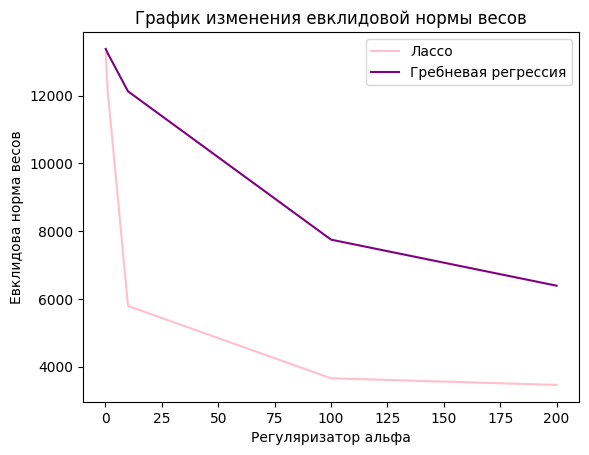

In [86]:
import matplotlib.pyplot as plt
plt.plot(alphaa,w_lasso,label='Лассо',color='pink')
plt.plot(alphaa,w_ridge,label='Гребневая регрессия',color='purple')
plt.title('График изменения евклидовой нормы весов')
plt.xlabel('Регуляризатор альфа')
plt.ylabel('Евклидова норма весов')
plt.legend()


#### Как было сказано ранее, Лассо штрафует жестче, так как может занулить отдельные признаки из-за их незначительности. На графике  тоже видно тенденцию к более агрессивному снижению весу у Лассо - чем выше альфа, тем ниже норма весов.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [94]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5,alphas=[0.1, 1, 10, 100, 200]).fit(X_train, y_train) #5 участков для кросс-валидации
mean=np.mean(reg.mse_path_,axis=1) #нахожу среднее знач ошибок по матрице ошибок на каждом участке кросв-вадидации
table=pd.DataFrame({'a':reg.alphas_,'mse': mean})
display(table)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 371837312.6590042, tolerance: 47710158.66435484
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8466449203.806625, tolerance: 47710158.66435484
  model = cd_fast.enet_coordinate_descent_gram(


,a,mse
0,200.0,2.453091e+06
1,100.0,2.250627e+06
2,10.0,1.534495e+06
3,1.0,1.318293e+06
4,0.1,1.376157e+06


#### Наибольшее качество дает a=1, так как ошибка там наименьшая. Но я человек мнительный, поэтому проверка два странным способом ниже:

In [88]:
#поскольку меня одолели сомнения, делала проверку другим способом. Код в этом окне - из документации.
#Пыталась понять, какие есть метрики для другого вида модуля кросс-валидации, так как смутила neg_mean_squared_error
from sklearn.metrics import get_scorer_names
all_scorers = get_scorer_names()
print(all_scorers)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [89]:
from sklearn.model_selection import GridSearchCV
regg= GridSearchCV(lasso, param_grid={'alpha': [0.1, 1, 10, 100, 200]},scoring='neg_mean_squared_error', cv=5).fit(X_train,y_train) #использую neg, так как обычную mse не нашла (из-за специфики модели)
#эта особенность сказалась только на знаке MSE
print(regg.best_params_)
print(regg.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.099e+10, tolerance: 4.771e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.521e+08, tolerance: 4.771e+07
  model = cd_fast.enet_coordinate_descent(


{'alpha': 1}
-1318408.7336883112


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [96]:
lasso=Lasso(alpha=1)
lasso.fit(X_train,y_train)
display(pd.DataFrame({'признаки':X.columns, 'коэффициенты':lasso.coef_}))


,признаки,коэффициенты
0,carat,5178.192408
1,depth,-93.848226
2,table,-62.014948
3,x,-991.144857
4,y,-0.000000
5,z,-36.303614
6,cut_Good,541.316410
7,cut_Ideal,780.047993
8,cut_Premium,707.909466
9,cut_Very Good,675.291448


#### По модулю carat и x все еще самые информативные. Наименьшую информативность несет y и z, вероятно, поскольку x и карат являются уже достаточными для предсказания цены, то есть y и z избыточны

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [97]:
pred=lasso.predict(X_test)
print("Среднеквадратичная ошибка Lasso:",mean_squared_error(y_test,pred))
print("Среднеквадратичная ошибка линейной регрессии:", MSE_te)

Среднеквадратичная ошибка Lasso: 1238804.9405458749
Среднеквадратичная ошибка линейной регрессии: 1235356.8682154268


Линейная регрессия оказалась лучше лассо... Думаю, its my fault, потому что по логике вещей должно быть с точностью наоборот. Возможно так произошло из-за специфики данных: мультиколлинеарность была изначально некритична, а лассо занулила важные признаки, что скзаалось на качестве модели.